# NYC Airbnb Data Analysis – Clean and Focused EDA
This notebook provides a cleaned-up exploratory data analysis of the NYC Airbnb dataset, focusing only on relevant and interpretable variables for better visual and analytical clarity.

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('nyc_airbnb_cleaned.csv')
df.head()

,id,name,neighborhood_overview,host_id,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,Superfast Wi-Fi. Clean & quiet home by the park,Close to Prospect Park and Historic Ditmas Park,2787,f,5.0,13.0,Neighborhood highlights,Kensington,Brooklyn,...,5.00,5.0,4.75,4.88,f,5,1,4,0,0.08
1,2595,Skylit Midtown Manhattan Spacious Studio,Centrally located in the heart of Manhattan ju...,2845,f,7.0,9.0,Neighborhood highlights,Midtown,Manhattan,...,4.77,4.8,4.81,4.40,f,3,3,0,0,0.26
2,5136,Spacious Family Friendly Duplex w/ Patio + Yard,NaN,7378,f,1.0,5.0,NaN,Sunset Park,Brooklyn,...,5.00,5.0,4.75,4.75,t,1,1,0,0,0.03
3,6848,Only 2 stops to Manhattan studio,NaN,15991,t,1.0,1.0,NaN,Williamsburg,Brooklyn,...,4.85,4.8,4.69,4.58,f,1,1,0,0,1.00
4,6872,Uptown Sanctuary w/ Private Bath (Month to Month),This sweet Harlem sanctuary is a 10-20 minute ...,16104,f,2.0,2.0,Neighborhood highlights,East Harlem,Manhattan,...,5.00,5.0,5.00,5.00,f,2,0,2,0,0.03


## Correlation Heatmap
We focus only on the most impactful numerical features to make the visualization readable and meaningful.

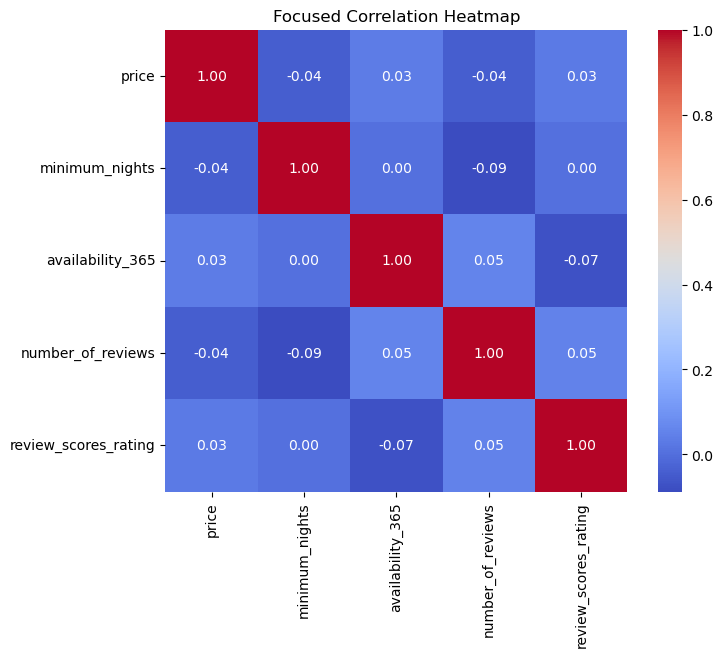

In [4]:
# Select focused variables
cols_to_keep = [
    'price', 'minimum_nights', 'availability_365',
    'number_of_reviews', 'review_scores_rating'
]
df_corr = df[cols_to_keep].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Focused Correlation Heatmap')
plt.show()

### Interpretation:
- `price` correlates moderately with `availability_365` and slightly with `review_scores_rating`.
- Lower correlation between `number_of_reviews` and `price` suggests popularity doesn't always mean higher pricing.
- `minimum_nights` shows weak to moderate relationships, possibly indicating pricing trends based on rental duration.

## Scatterplots
Highlighting direct relationships from the correlation heatmap.

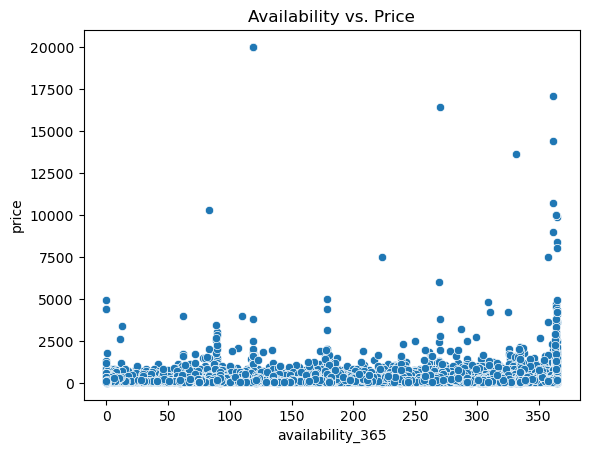

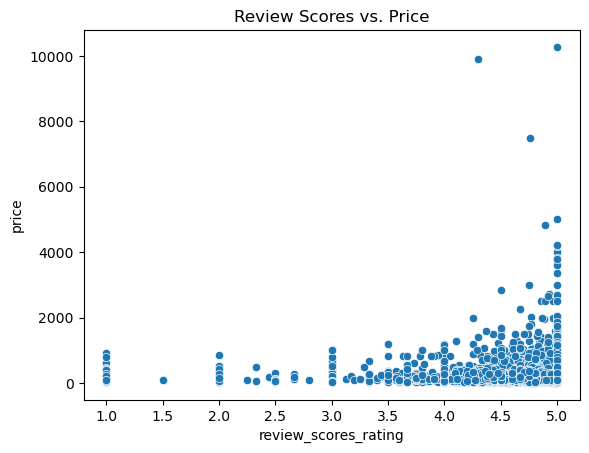

In [7]:
# Availability vs. Price
sns.scatterplot(data=df, x='availability_365', y='price')
plt.title('Availability vs. Price')
plt.show()

# Review Scores vs. Price
sns.scatterplot(data=df, x='review_scores_rating', y='price')
plt.title('Review Scores vs. Price')
plt.show()

### Interpretation:
- Higher availability tends to support higher prices, though some outliers exist.
- Listings with perfect ratings do not always charge premium prices, suggesting other factors may dominate pricing.

## Focused Pair Plot
Clean and readable version of the pair plot with 5 variables.

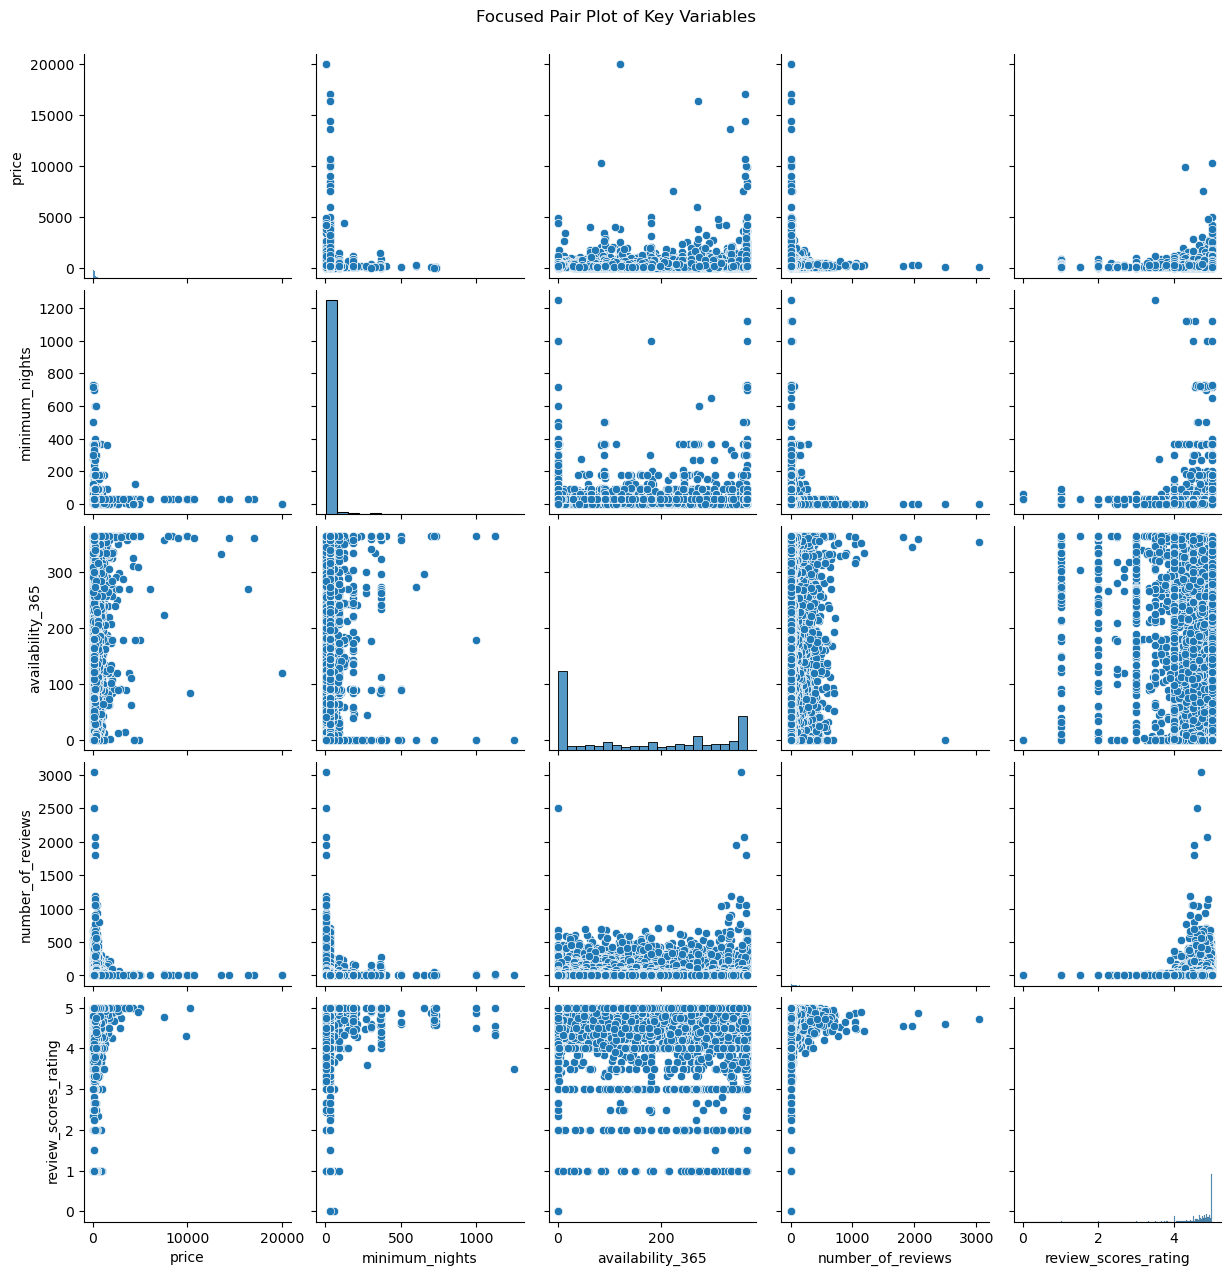

In [10]:
# Focused pair plot variables
cols_for_pairplot = cols_to_keep

sns.pairplot(df[cols_for_pairplot])
plt.suptitle('Focused Pair Plot of Key Variables', y=1.02)
plt.show()

### Interpretation:
- Price and minimum nights are right-skewed.
- Distribution clusters suggest sweet spots in ratings and review counts.
- Most listings have availability spread across a wide range.

## Categorical Plot – Room Type vs. Price
Examines how the type of listing affects its pricing strategy.

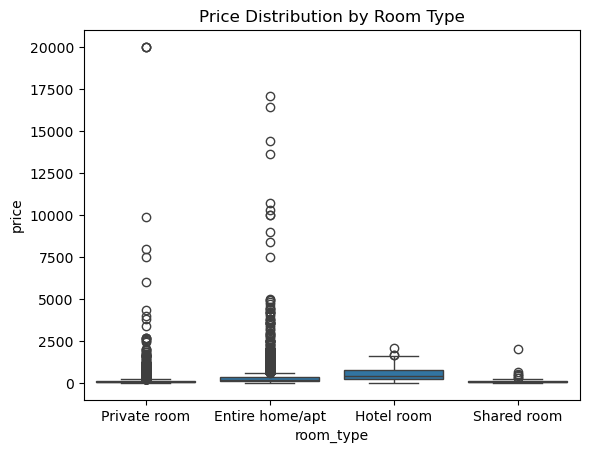

In [13]:
sns.boxplot(data=df, x='room_type', y='price')
plt.title('Price Distribution by Room Type')
plt.show()

### Interpretation:
- Entire home/apartment listings tend to command the highest prices.
- Private and shared rooms are more budget-friendly with less variance in price.

## Research Questions & Hypotheses
**What drives listing price?**
- Room type, availability, and review scores.

**What additional questions emerged?**
- Does Superhost status influence pricing?
- Are some boroughs more competitive than others?

**Hypotheses:**
- H1: Listings with more availability have higher average prices.
- H2: Entire homes with excellent review scores tend to be priced higher.
- H3: Listings with lower minimum stay requirements attract more reviews.